In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats



In [2]:
df = pd.read_csv(r"C:\Users\flora\Documents\TechLabs\Project\dataset_gym_membership_group2.csv")
df.head()

,User_ID,Age,Gender,Annual_Income,Membership_Type,Membership_Duration,Frequency_of_Visit,Preferred_Time,Previous_Membership,Marital_Status,Location,Promotion_Response,Health_Condition,Membership_Prediction,Professional,Professional_Status
0,1,56,Male,95635,VIP,41,6,Evening,No,Married,Suburban,No,Excellent,Yes,Late Career,Working
1,2,69,Other,69800,Premium,24,4,Evening,Yes,Married,Suburban,No,Excellent,Yes,Retired,Retired
2,3,46,Female,66158,Premium,20,4,Evening,Yes,Married,Urban,No,Good,No,Employed,Working
3,4,32,Male,81401,Premium,6,6,Evening,Yes,Married,Urban,No,Poor,Yes,Employed,Working
4,5,60,Female,77375,Premium,25,5,Afternoon,No,Married,Urban,No,Good,No,Late Career,Working


In [3]:
df.shape

(20000, 16)

In [4]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Annual_Income', 'Membership_Type',
       'Membership_Duration', 'Frequency_of_Visit', 'Preferred_Time',
       'Previous_Membership', 'Marital_Status', 'Location',
       'Promotion_Response', 'Health_Condition', 'Membership_Prediction',
       'Professional', 'Professional_Status'],
      dtype='object')

In [5]:
df.columns


Index(['User_ID', 'Age', 'Gender', 'Annual_Income', 'Membership_Type',
       'Membership_Duration', 'Frequency_of_Visit', 'Preferred_Time',
       'Previous_Membership', 'Marital_Status', 'Location',
       'Promotion_Response', 'Health_Condition', 'Membership_Prediction',
       'Professional', 'Professional_Status'],
      dtype='object')

<Axes: xlabel='Annual_Income', ylabel='Count'>

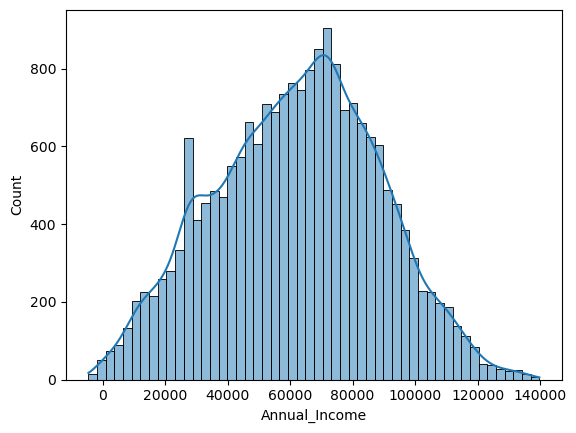

In [6]:
sns.histplot(df.Annual_Income.dropna(), kde= True)

(<Axes: xlabel='Health_Condition', ylabel='Count'>,)

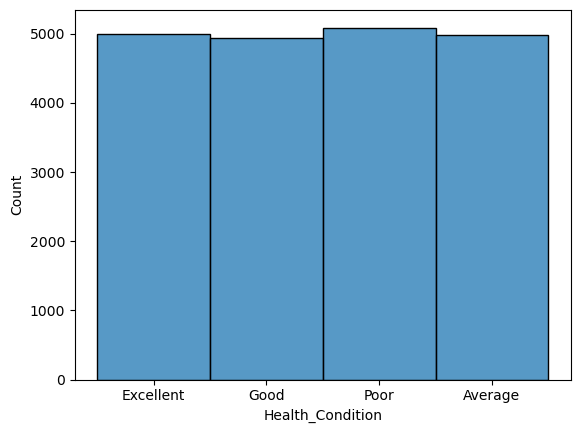

In [7]:
 sns.histplot(df.Health_Condition.dropna(),kde=False), 

<Axes: xlabel='Gender', ylabel='Count'>

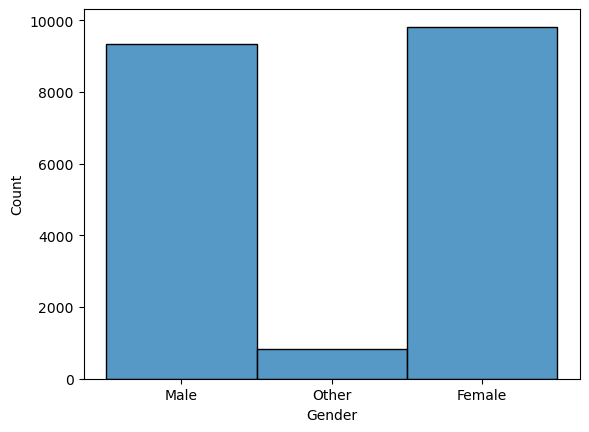

In [8]:
 sns.histplot(df.Gender.dropna(),kde=False)

In [9]:
filt_women = (df["Gender"] == "Female")
women_only = df.loc[filt_women, "Membership_Type"].value_counts()

filt_men = (df["Gender"] == "Male")
men_only = df.loc[filt_men, "Membership_Type"].value_counts()
print(women_only)
print(men_only)

Membership_Type
Premium    4076
Basic      3623
VIP        2118
Name: count, dtype: int64
Membership_Type
VIP        3476
Basic      3029
Premium    2843
Name: count, dtype: int64


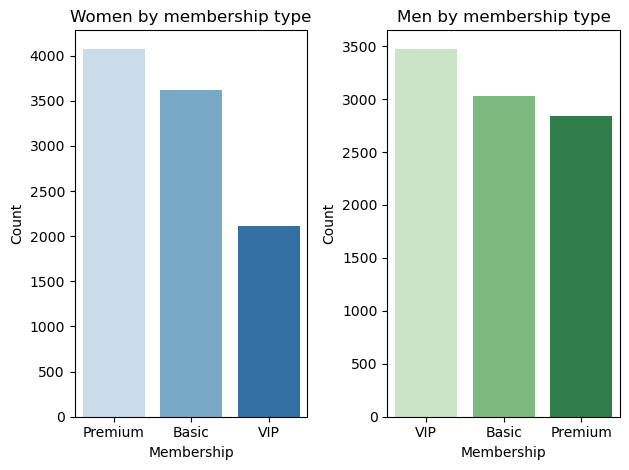

In [10]:
plt.subplot(1, 2, 1)

sns.barplot(x=women_only.index, y=women_only.values, palette="Blues")
plt.title("Women by membership type")
plt.xlabel("Membership")
plt.ylabel("Count")
plt.subplot(1, 2, 2)  
sns.barplot(x=men_only.index, y=men_only.values, palette="Greens")
plt.title("Men by membership type")
plt.xlabel("Membership")
plt.ylabel("Count")

plt.tight_layout()  #
plt.show()

In [11]:
women_loc=df.loc[filt_women, "Location"].value_counts()
print(women_loc)
men_loc=df.loc[filt_men, "Location"].value_counts()
print(men_loc)

Location
Urban       4034
Suburban    2895
Rural       2888
Name: count, dtype: int64
Location
Urban       3678
Suburban    2855
Rural       2815
Name: count, dtype: int64


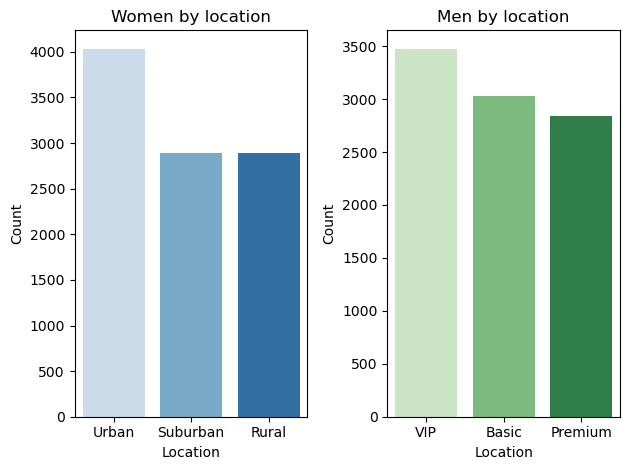

In [12]:
plt.subplot(1, 2, 1)

sns.barplot(x=women_loc.index, y=women_loc.values, palette="Blues")
plt.title("Women by location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.subplot(1, 2, 2)  
sns.barplot(x=men_only.index, y=men_only.values, palette="Greens")
plt.title("Men by location")
plt.xlabel("Location")
plt.ylabel("Count")

plt.tight_layout()  #
plt.show()

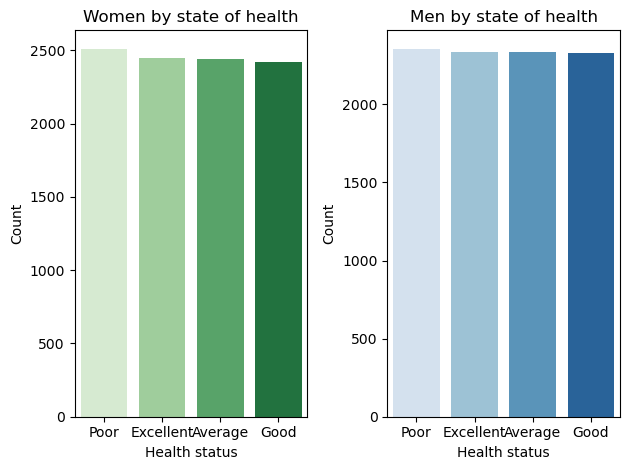

In [13]:
fem_health=df.loc[filt_women, "Health_Condition"].value_counts()
men_health=df.loc[filt_men, "Health_Condition"].value_counts()

plt.subplot(1,2,1)
sns.barplot(x=fem_health.index, y=fem_health.values, palette="Greens")
plt.title("Women by state of health")
plt.xlabel("Health status")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.barplot(x=men_health.index, y=men_health.values, palette="Blues")
plt.title("Men by state of health")
plt.xlabel("Health status")
plt.ylabel("Count")

plt.tight_layout()

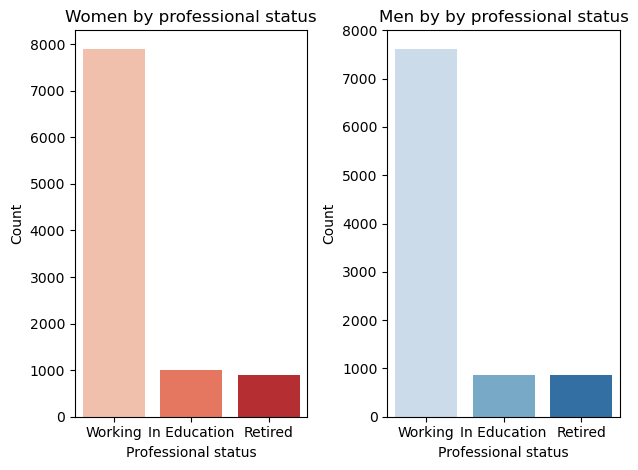

In [14]:
prof_fem=df.loc[filt_women, "Professional_Status"].value_counts()
prof_men=df.loc[filt_men, "Professional_Status"].value_counts()

plt.subplot(1,2,1)
sns.barplot(x=prof_fem.index, y=prof_fem.values, palette="Reds")
plt.title("Women by professional status")
plt.xlabel("Professional status")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.barplot(x=prof_men.index, y=prof_men.values, palette="Blues")
plt.title("Men by by professional status")
plt.xlabel("Professional status")
plt.ylabel("Count")

plt.tight_layout()

In [15]:
df["Marital_Status"].value_counts()
divorced_filt=(df["Marital_Status"]== "Divorced")
single_filt=(df["Marital_Status"]== "Single")
married_filt=(df["Marital_Status"]=="Married")

In [16]:
div_mem = df.loc[divorced_filt, "Membership_Type"].value_counts()
single_mem = df.loc[single_filt, "Membership_Type"].value_counts()
married_mem = df.loc[married_filt, "Membership_Type"].value_counts()

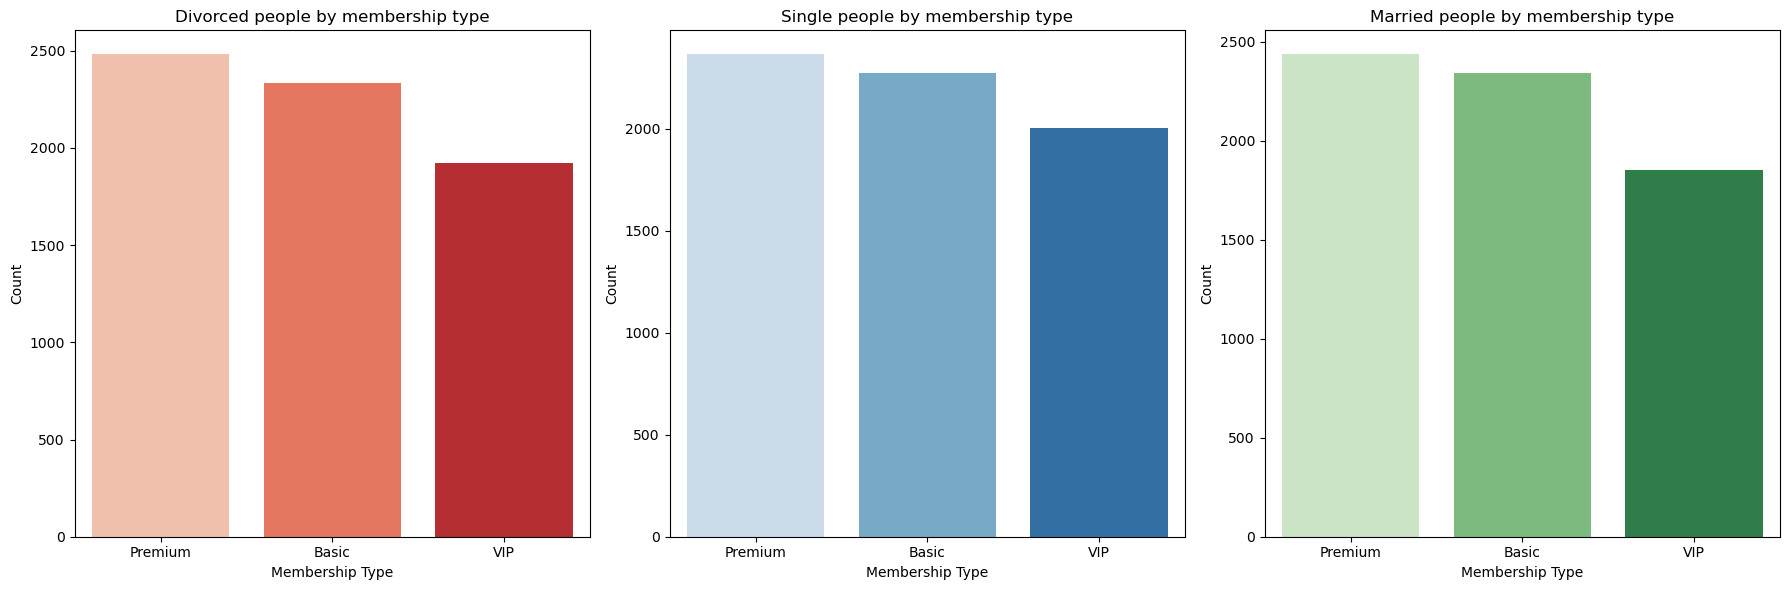

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=div_mem.index, y=div_mem.values, palette="Reds")
plt.title("Divorced people by membership type")
plt.xlabel("Membership Type")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.barplot(x=single_mem.index, y=single_mem.values, palette="Blues")
plt.title("Single people by membership type")
plt.xlabel("Membership Type")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.barplot(x=married_mem.index, y=married_mem.values, palette="Greens")
plt.title("Married people by membership type")
plt.xlabel("Membership Type")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

In [ ]:
div_health=df.loc[divorced_filt, "Health_Condition"].value_counts()
mar_health=df.loc[married_filt, "Health_Condition"]. value_counts()
sin_health=df.loc[single_filt, "Health_Condition"].value_counts()

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(x=div_health.index, y=div_health.values, palette="Reds")
plt.title("Divorced people by health")
plt.xlabel("Health status")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.barplot(x=sin_health.index, y=sin_health.values, palette="Blues")
plt.title("Single people by health")
plt.xlabel("Health status")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.barplot(x=mar_health.index, y=mar_health.values, palette="Greens")
plt.title("Married people by health")
plt.xlabel("Health status")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

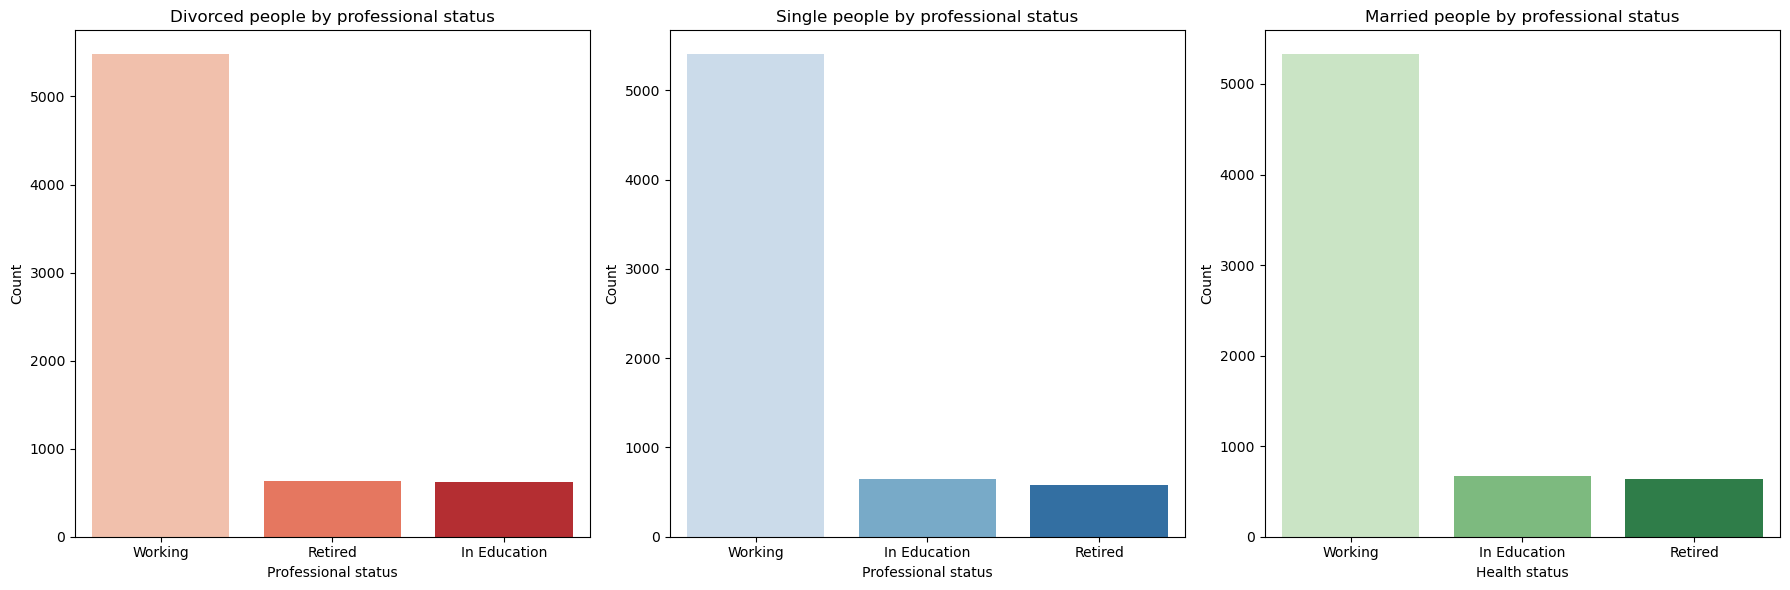

In [19]:
div_prof=df.loc[divorced_filt, "Professional_Status"].value_counts()
mar_prof=df.loc[married_filt, "Professional_Status"]. value_counts()
sin_prof=df.loc[single_filt, "Professional_Status"].value_counts()

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(x=div_prof.index, y=div_prof.values, palette="Reds")
plt.title("Divorced people by professional status")
plt.xlabel("Professional status")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.barplot(x=sin_prof.index, y=sin_prof.values, palette="Blues")
plt.title("Single people by professional status")
plt.xlabel("Professional status")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.barplot(x=mar_prof.index, y=mar_prof.values, palette="Greens")
plt.title("Married people by professional status")
plt.xlabel("Health status")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

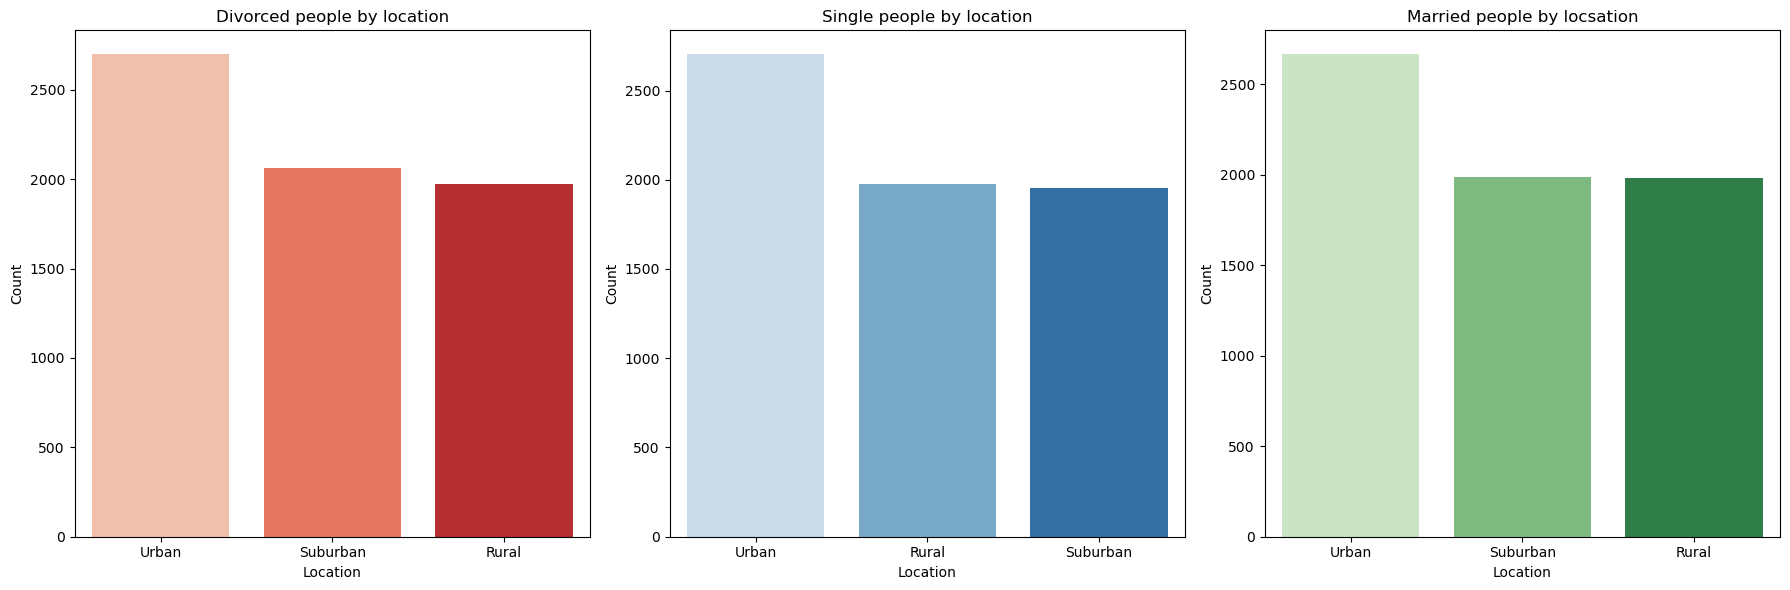

In [21]:
div_loc=df.loc[divorced_filt, "Location"].value_counts()
mar_loc=df.loc[married_filt, "Location"]. value_counts()
sin_loc=df.loc[single_filt, "Location"].value_counts()

plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.barplot(x=div_loc.index, y=div_loc.values, palette="Reds")
plt.title("Divorced people by location")
plt.xlabel("Location")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.barplot(x=sin_loc.index, y=sin_loc.values, palette="Blues")
plt.title("Single people by location")
plt.xlabel("Location")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.barplot(x=mar_loc.index, y=mar_loc.values, palette="Greens")
plt.title("Married people by locsation")
plt.xlabel("Location")
plt.ylabel("Count")


plt.tight_layout()
plt.show()

<Axes: xlabel='Annual_Income', ylabel='Membership_Duration'>

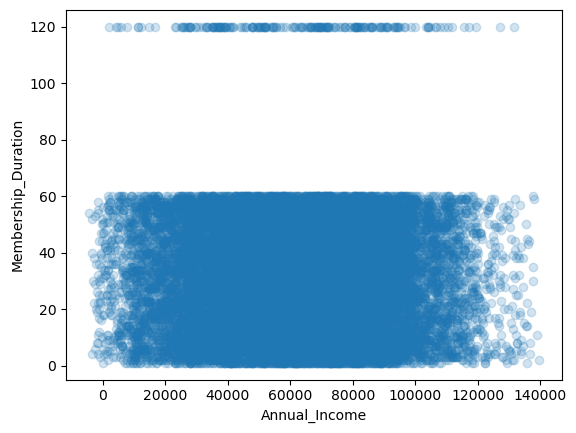

In [22]:
sns.regplot(x="Annual_Income", y="Membership_Duration", data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

In [23]:
df.Membership_Duration.dropna().describe()

count    20000.000000
mean        31.326550
std         19.385167
min          1.000000
25%         16.000000
50%         31.000000
75%         46.000000
max        120.000000
Name: Membership_Duration, dtype: float64

<Axes: xlabel='Membership_Duration', ylabel='Count'>

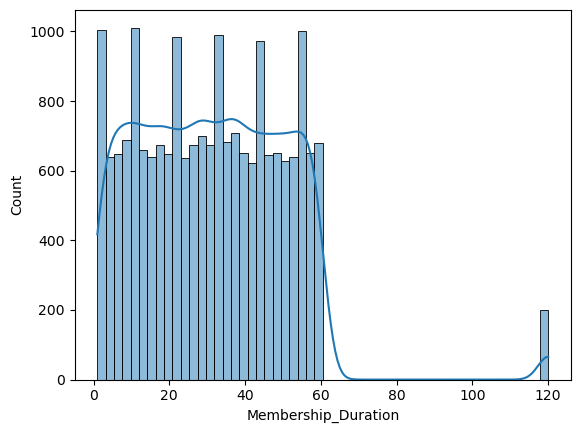

In [24]:
sns.histplot(df.Membership_Duration.dropna(), kde= True)

<Axes: xlabel='Age', ylabel='Annual_Income'>

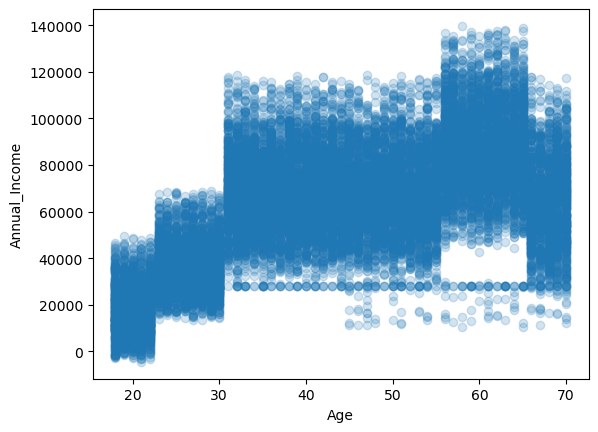

In [25]:
sns.regplot(x="Age", y="Annual_Income", data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

<Axes: xlabel='Frequency_of_Visit', ylabel='Annual_Income'>

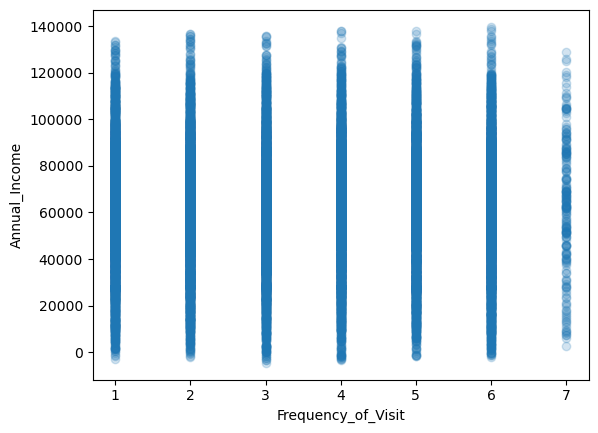

In [26]:
sns.regplot(x="Frequency_of_Visit", y="Annual_Income", data=df, fit_reg=False, scatter_kws={"alpha": 0.2})